In [140]:
import numpy as np # библиотека для эффективной работы с данными
import pandas as pd # библиотека для работы с наборами данных

df = pd.read_csv('dsu.csv')

df

,struct,num,elapsed
0,5,500,3
1,5,1000,9
2,5,1500,31
3,5,2000,73
4,5,2500,130
...,...,...,...
2521,1,4500,592
2522,1,5000,755
2523,1,500,3
2524,1,1000,18


In [144]:
label_names = {
	1: "Покраска элементов",
	2: "Список компонент + Весовая эвристика",
	3: "Лес деревьев",
	4: "Сжатие пути",
	5: "Сжатие пути + Ранговая эвристика"
}

data = df.groupby(['struct', 'num'], as_index=False)['elapsed'].agg(['mean', 'min', 'max'])

data

,struct,num,mean,min,max
0,1,500,4.150538,3,8
1,1,1000,18.838710,15,25
2,1,1500,50.010753,46,62
3,1,2000,98.097826,91,129
4,1,2500,163.054348,153,241
5,1,3000,245.586957,228,352
6,1,3500,343.260870,319,537
7,1,4000,454.500000,426,605
8,1,4500,584.184783,553,678
9,1,5000,735.760870,688,874


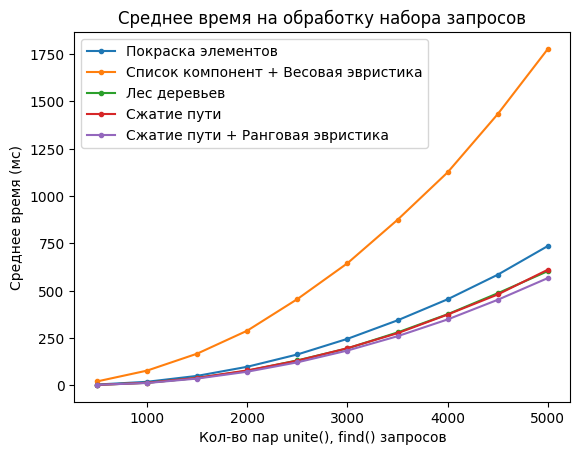

In [143]:
import matplotlib.pyplot as plt # библиотека для визуализации

# Группируем по 'struct' и создаем словарь для хранения данных для каждого struct
struct_groups = data.groupby('struct')

# Рисуем линии для каждого struct
for struct, group in data.groupby('struct'):
	plt.plot(group['num'], group['mean'], label=label_names[struct], marker='.')

# Добавляем подписи и легенду
plt.xlabel('Кол-во пар unite(), find() запросов')
plt.ylabel('Среднее время (мс)')
plt.title('Среднее время на обработку набора запросов')
plt.legend()
plt.show()

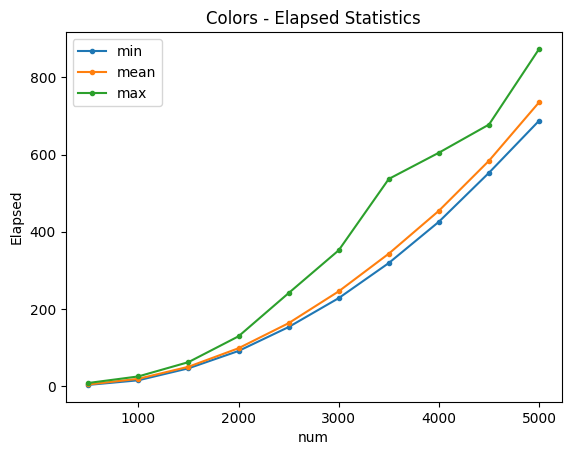

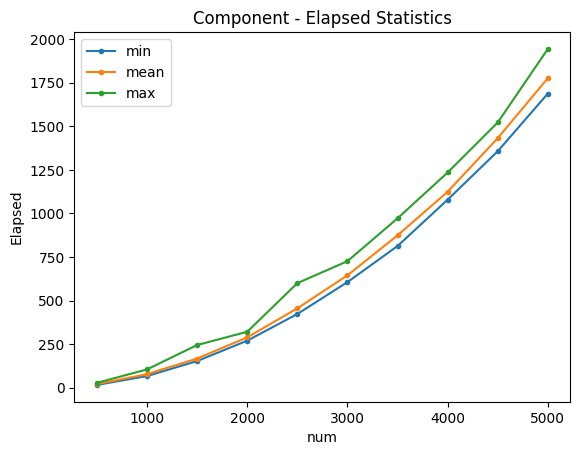

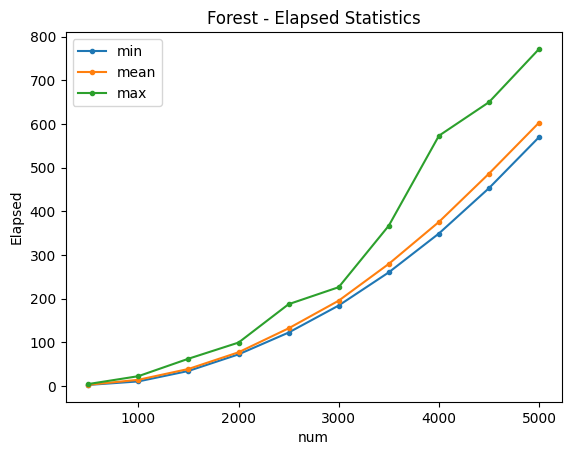

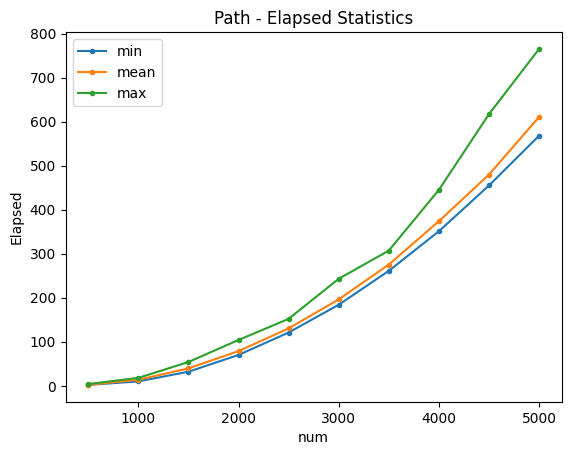

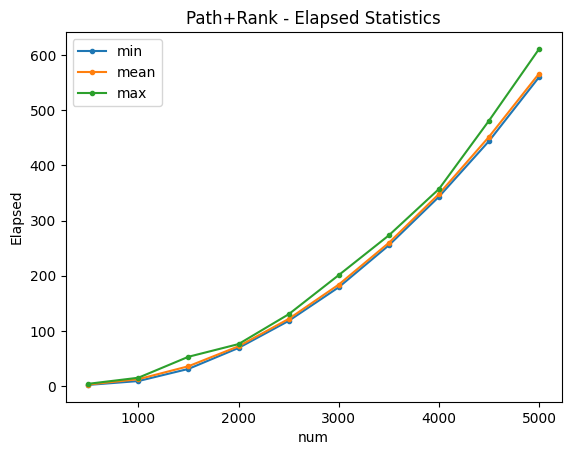

In [ ]:
# Группируем по 'struct' и вычисляем минимальное, среднее и максимальное значение 'elapsed' для каждой группы
struct_groups = data.groupby('struct')

# Создаем по одному холсту для каждой struct
for struct, group in struct_groups:
    fig, ax = plt.subplots()

    # Рисуем графики для min, mean и max
    ax.plot(group['num'], group['min'], label='min', marker='.')
    ax.plot(group['num'], group['mean'], label='mean', marker='.')
    ax.plot(group['num'], group['max'], label='max', marker='.')

    # Добавляем подписи и легенду
    ax.set_xlabel('num')
    ax.set_ylabel('Elapsed')
    ax.set_title(f'{label_names[struct]} - Elapsed Statistics')
    ax.legend()

# Показываем все графики
plt.show()

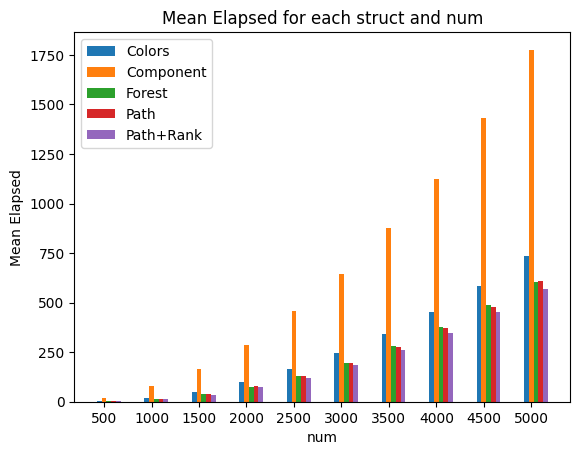

In [ ]:
# Группируем по 'num' и 'struct' и вычисляем среднее значение 'elapsed'
histogram_data = data.groupby(['num', 'struct'], as_index=False)['mean'].mean()

# Для каждого struct создаем столбец в гистограмме

x = np.arange(len(histogram_data['num'].unique()))
width = 0.1
i = 0

for struct in histogram_data['struct'].unique():
	struct_data = histogram_data[histogram_data['struct'] == struct]
	plt.bar(x + width * i, struct_data['mean'], width, label=struct)
	i += 1

# Добавляем подписи и легенду
plt.xlabel('num')
plt.ylabel('Mean Elapsed')
plt.title('Mean Elapsed for each struct and num')
plt.xticks(x + width, histogram_data['num'].unique())
plt.legend()
plt.show()